Machine Learning

                                                                                   #Compte rendu TP  ML
                                                                                   #Section: LCS3-GLSI
                                                                                             3C groupe 2
Nom et Prenom:
Groupe:
Enseignante: Nissaf Fredj

In [1]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [7]:
#  1) Lire le fichier Houses.csv et afficher ses données
data = pd.read_csv("./Houses.csv")

print(data.describe())
print(data.shape)
# Verification des données et dimensions du dataset

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [194]:
# 2) Créer et former un modèle de régression linéaire entre les variables indépendante('Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population') et la variable dépendante (à prédire) Price


In [10]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
print(X.head(),y.head(),sep='\n\n ###############\n\n')

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  

 ###############

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


In [209]:
# 3) Procéder à une normalisation des données en utilisant le module preprocessing


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Il faut ajouter cet importation pour puvoir utiliser (instancier) la class MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [210]:
# 4) appel de fonction normalization


In [13]:
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

In [211]:
# 5) Diviser les données en données d’entraînement et données de test (les données de test représentent 20 % de l’ensemble des données).



In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [15]:
x_train.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.564920,0.484251,0.497637,0.440529,0.517344
std,0.119062,0.144518,0.134159,0.272528,0.143568
min,0.000000,0.005635,0.000000,0.000000,0.000000
25%,0.485638,0.389438,0.405559,0.253333,0.420204
50%,0.568708,0.482865,0.500559,0.455556,0.519306
75%,0.645665,0.582179,0.588438,0.553333,0.613436
max,0.966642,1.000000,0.936257,1.000000,1.000000


In [16]:
y_train.describe()

count    4.000000e+03
mean     1.229577e+06
std      3.536607e+05
min      1.593866e+04
25%      9.942201e+05
50%      1.226441e+06
75%      1.471210e+06
max      2.370231e+06
Name: Price, dtype: float64

In [212]:
# 6) Instancier un algorithme de régression linéaire


In [17]:
Mon_model = LinearRegression()

In [18]:
# 7) Entraîner le modèle
Mon_model.fit(x_train, y_train)

LinearRegression()

In [216]:
# 8) appliquer le modèle sur les données de test



In [20]:
y_pred = Mon_model.predict(x_test)

In [219]:
# 9) calculer les deux métriques mean_squared_error et r2_score et les afficher


In [21]:

# MSE = (1/n) * sum((y_pred - y_true) ^ 2)
MSE = mean_squared_error(y_test, y_pred)
# R 2 = 1 – ∑ i = 1 n ( y i – y ^ i ) 2 ∑ i = 1 n ( y i – y ¯ ) 2
R2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", MSE)
print("R2 Score:", R2)

Mean Squared Error: 10089009300.893988
R2 Score: 0.9179971706834331


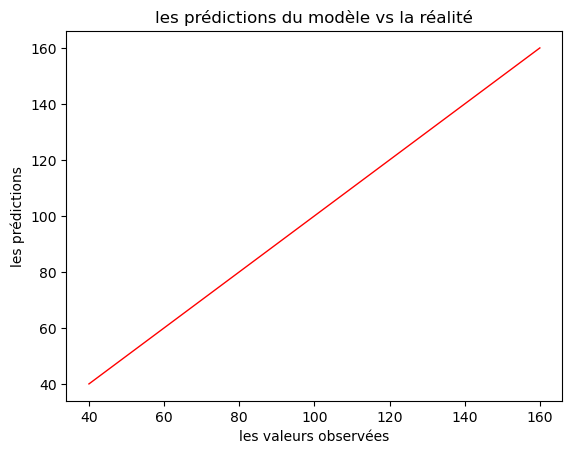

In [22]:
# 10) réaliser une courbe affichant les prédictions du modèle et les vrai valeurs de la variable à prédire des données de test (une seule ligne du code) 
####Titre du graph ####

plt.title("les prédictions du modèle vs la réalité")
#### Label des valeurs observées ####

plt.xlabel("les valeurs observées")
#### Label des valeurs observées   ####


plt.ylabel("les prédictions")
#### les dimentions du graph ####


plt.plot([40.0,160.0],[40.0,160.0],'red',lw=1)


# plt.show()

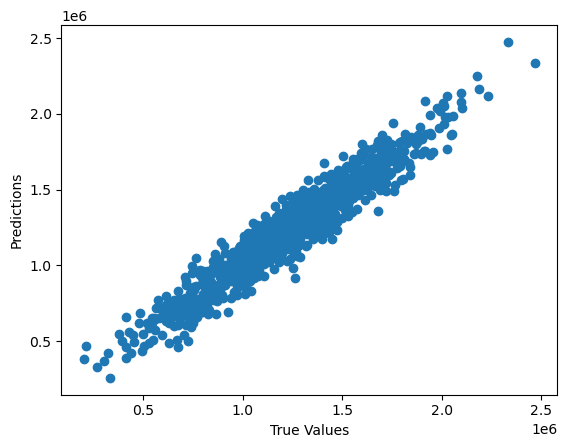

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

<!-- -->On Voit clairement que le nuage des point entoure la courbe donc ,on addition au metriques calculées on peut affirmer que le model est bien entainné -->